In [2]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import requests


from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
#Description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
#finding null value

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
#df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# D V Count plot

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


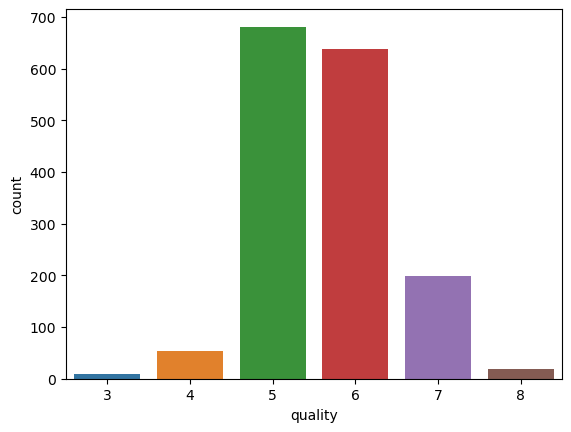

In [22]:
#sns.countplot(df[' quality '])
#plt.show()
plt=sns.countplot(x = "quality", data=df)
print(df["quality"].value_counts())

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


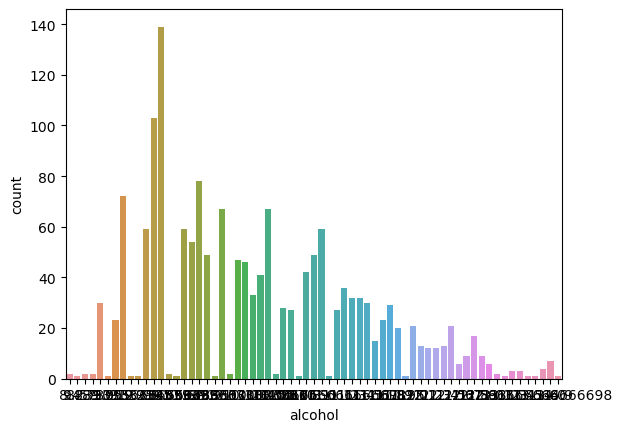

In [23]:
plt=sns.countplot(x = "alcohol", data=df)
print(df["alcohol"].value_counts())

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64


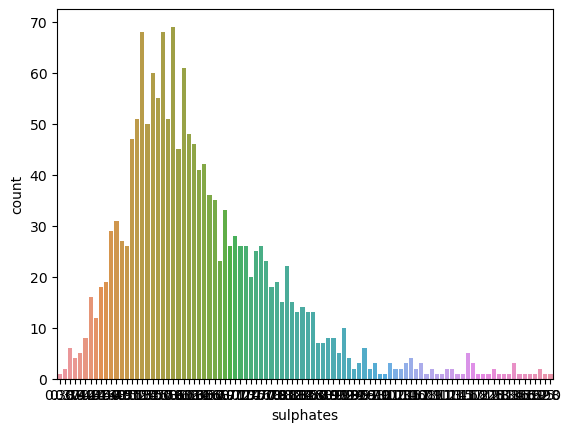

In [24]:
plt=sns.countplot(x = "sulphates", data=df)
print(df["sulphates"].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


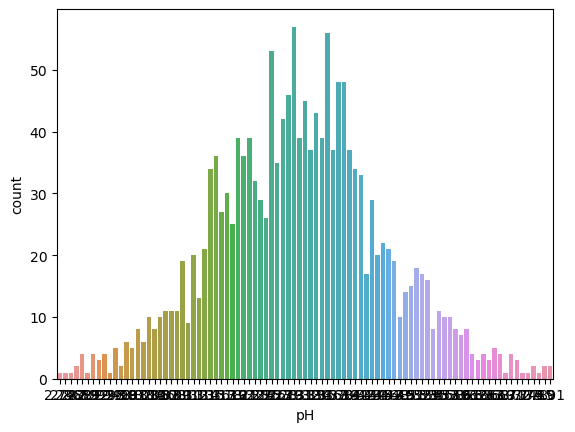

In [25]:
plt=sns.countplot(x = "pH", data=df)
print(df["pH"].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


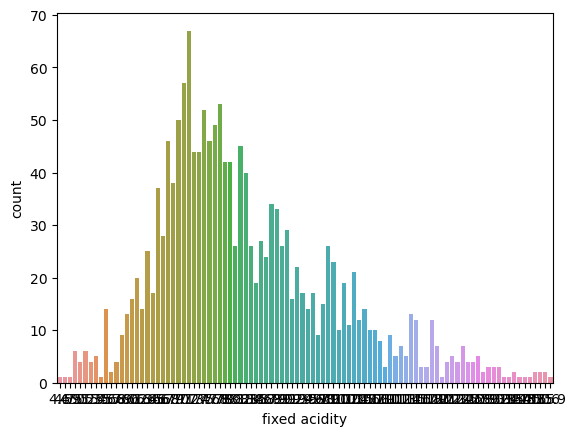

In [26]:
plt=sns.countplot(x = "fixed acidity", data=df)
print(df["fixed acidity"].value_counts())

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

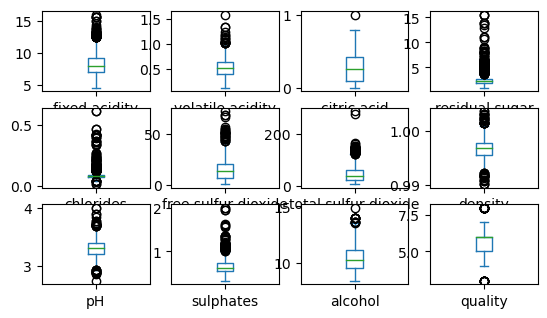

In [35]:
df.plot(kind ='box',subplots = True, layout =(4,4), sharex = False)

<Axes: >

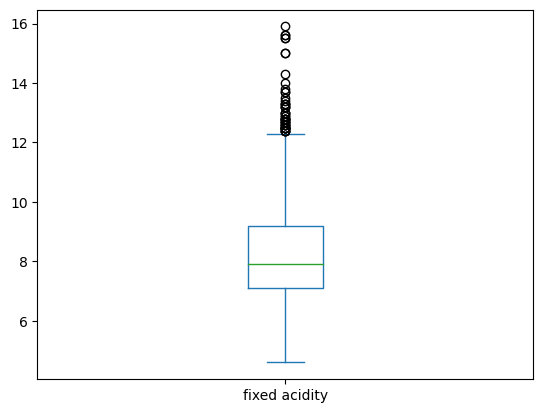

In [36]:
df['fixed acidity'].plot(kind ='box')

In [ ]:
#HIST

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

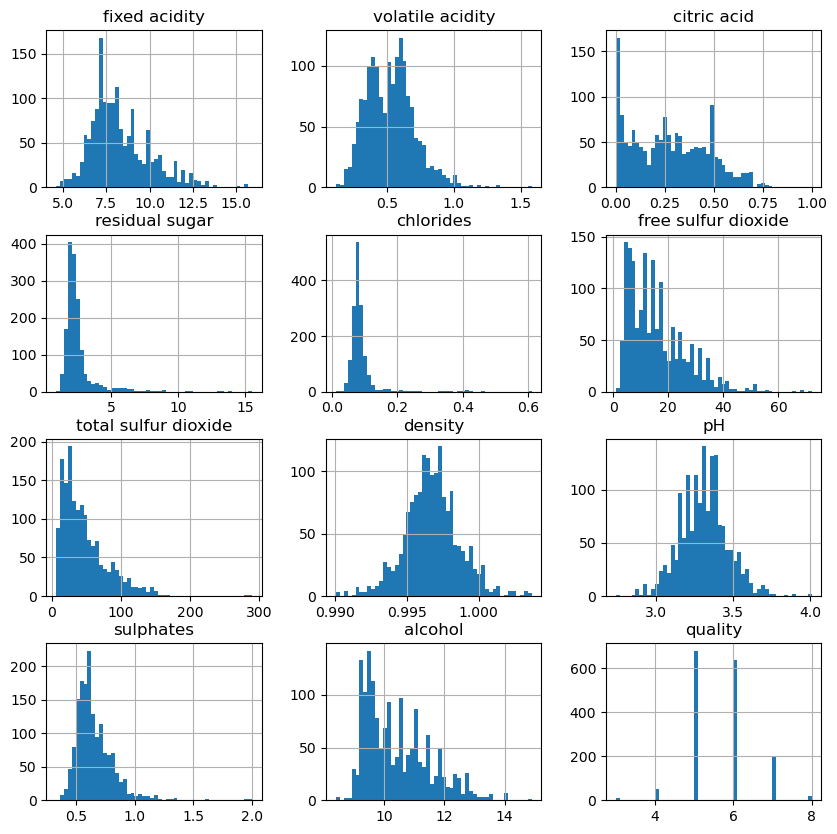

In [40]:
df.hist(figsize=(10,10),bins=50)


In [ ]:
#Feature Selection

In [41]:
df.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
198,5.4,0.835,0.08,1.20,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
406,9.8,0.440,0.47,2.50,0.063,9.0,28.0,0.99810,3.24,0.65,10.8,6
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.4,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
1225,9.2,0.460,0.23,2.60,0.091,18.0,77.0,0.99922,3.15,0.51,9.4,5


In [42]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [44]:
# If wine quality is 7 or above then will consider as good quality wine
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.sample(14)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1191,6.5,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5,0
671,8.2,0.730,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,0
1026,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6,0
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6,0
183,6.8,0.610,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,5,0
629,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.3,5,0
469,8.7,0.820,0.02,1.2,0.070,36.0,48.0,0.99520,3.20,0.58,9.8,5,0
1297,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,0
586,11.1,0.310,0.49,2.7,0.094,16.0,47.0,0.99860,3.12,1.02,10.6,7,1
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6,0


In [45]:
# total number of good vs bad wines samples
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [47]:
# Separating depedent and indepedent variables
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [48]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [50]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [51]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07474283 0.10050138 0.09380652 0.0753212  0.06869126 0.0703836
 0.08043804 0.08920791 0.0685601  0.10909189 0.16925527]


In [ ]:
#Splitting Dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression: